# t-SNE visualization on Taiyuan karst water dataset

The Taiyuan Karst water dataset consists of 37 samples of both cold (water temperature below 30 ℃) and thermal karst groundwater from Taiyuan, northern China. A total of 31 parameters including 3 physicochemistry variables, 9 major elements, 4 minor elements, and 15 trace elements were analyzed. These samples were collected from three geologically sub-systems, namely, the Xishan Mountain karst groundwater subsystem (XMK), the Dongshan Mountain karst groundwater subsystem (DMK), and the Beishan Mountain karst groundwater subsystem (BMK). Furthermore, samples from each subsystem were grouped to be from different hydrogeological zones such as the recharge and flow-through zone, cold water discharge zone, and the thermal water discharge zone based on the hydrogeochemical information as stated by Ma et al. (2011). 

## Load libraies

In [1]:
# Basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *

In [2]:
# Dimension reduction and clustering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from scipy.cluster import hierarchy

In [3]:
# Global plot settings
%matplotlib inline
np.random.seed(10)
plt.style.use('default')

## Load data

In [4]:
# Load data
df = pd.read_csv('TaiyuanKarst.csv', header=0)

# Show the first 5 rows
df.head(5)

,Subsystem,Region,Sample,Depth,Temperature,pH,EC,CO3,HCO3,F,...,Cd,Co,Cu,Hg,Li,Mn,Mo,Ni,Sb,Zn
0,DMK,Recharge and flow-through zone,RN01,570.0,16.0,7.74,482,n.d.,276.53,0.36,...,0.024,0.25,3.01,0.072,6.25,0.92,1.37,0.88,2.56,27
1,DMK,Cold water discharge zone,RN35,1100.0,23.0,6.80,700,n.d.,286.79,1.38,...,0.019,0.28,0.67,0.024,27.6,9.89,7.54,1.04,1.37,10
2,DMK,Cold water discharge zone,TY16,800.0,24.7,7.27,892,n.d.,285.18,0.44,...,0.568,0.44,n.m.,0.033,n.m.,18.2,2.61,2.55,n.m.,n.m.
3,DMK,Cold water discharge zone,TY17,960.0,18.7,7.30,923,n.d.,305.00,0.41,...,0.621,0.68,n.m.,0.042,0.09,4.31,10.12,3.4,n.m.,n.m.
4,DMK,Thermal water discharge zone,RN02,1150.0,30.0,7.60,985,n.d.,325.15,1.91,...,0.02,0.21,1.2,0.07,38.2,27.1,2.85,0.95,1.81,25.2


## Samples from XMK

### Preprocessing

In [7]:
# Step 1 : Feature selection
pars = ['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn']
X_df = df[df['Subsystem']=='XMK'][pars]

# Step 2 : Substitution of censored values
X_df = X_df.replace('n.d.', 0.0075)

# Step 3 : Screening the non-measurement values
X_df = X_df.replace('n.m.', np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X = np.log(np.float64(X_df.values))

# Step 5 : Standardization 
rescaledX = StandardScaler().fit_transform(X)

In [9]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 14 
Number of variables: 30


In [17]:
# Get the true lables for the remianing samples
Y_df = df.replace('n.m.', np.nan)
Y_df = Y_df[['Subsystem', 'Region', 'Sample', 'Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn']][df['Subsystem']=='XMK'].dropna(axis=0, how='any') 

print(Y_df['Region'].unique())

['Recharge and fow-through zone' 'Cold water discharge zone'
 'Thermal water discharge zone']


### PCA analysis

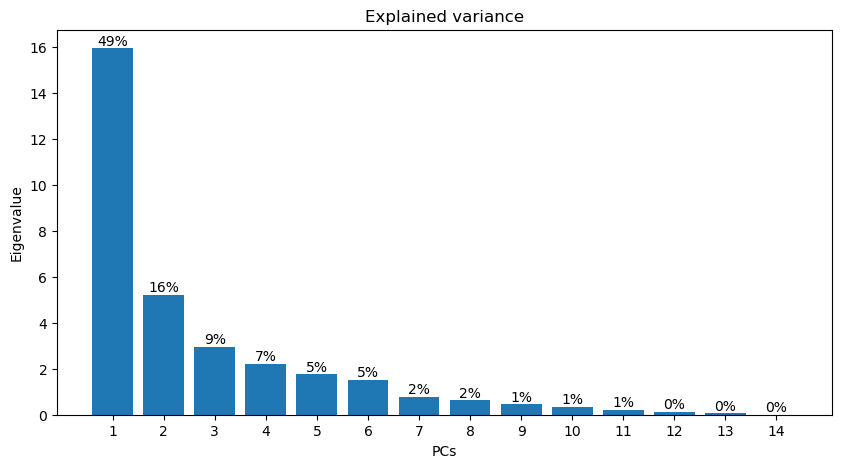

In [22]:
# Perform PCA analysis
pca = PCA(n_components=n_samples).fit(rescaledX)

# Plot the explained variance
plt.figure(figsize=(10, 5))
plt.bar([str(i) for i in range(1, 15)], pca.explained_variance_)
# plt.axhline(y=1, color='grey', linestyle='-.')
plt.xlabel('PCs')
plt.ylabel('Eigenvalue')
plt.title('Explained variance')

# Attach explained variance ratio above each bar
for i in range(n_samples):
    height = pca.explained_variance_[i]
    plt.annotate('{:.0f}%'.format(pca.explained_variance_ratio_[i] * 100),
                 xy=(i, height),
                 xytext=(0, 0),  
                 textcoords="offset points",
                 ha='center', va='bottom', 
                 rotation=0, fontsize=10)
    
plt.show()

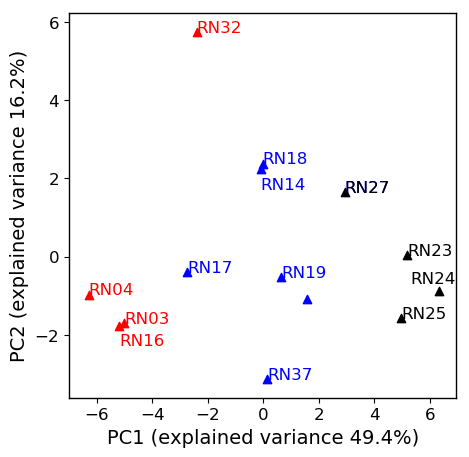

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rescaledX)

plt.figure(figsize=(5, 5))
plt.scatter(X_pca[Y_df['Region']=='Recharge and fow-through zone'][:, 0], X_pca[Y_df['Region']=='Recharge and fow-through zone'][:, 1], color='k', marker='^')
plt.scatter(X_pca[Y_df['Region']=='Cold water discharge zone'][:, 0],     X_pca[Y_df['Region']=='Cold water discharge zone'][:, 1], color='b', marker='^')
plt.scatter(X_pca[Y_df['Region']=='Thermal water discharge zone'][:, 0],  X_pca[Y_df['Region']=='Thermal water discharge zone'][:, 1], color='r', marker='^')

for sample in ['RN17', 'RN19', 'RN27', 'RN37']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1], sample, fontsize=12, color='b')

plt.text(X_pca[Y_df['Sample']=='RN32', 0], X_pca[Y_df['Sample']=='RN32', 1], 'RN32', fontsize=12, color='r')
    
plt.text(X_pca[Y_df['Sample']=='RN03', 0] + 0, X_pca[Y_df['Sample']=='RN03', 1], 'RN03', fontsize=12, color='r')
plt.text(X_pca[Y_df['Sample']=='RN04', 0] + 0, X_pca[Y_df['Sample']=='RN04', 1], 'RN04', fontsize=12, color='r')
plt.text(X_pca[Y_df['Sample']=='RN16', 0] + 0, X_pca[Y_df['Sample']=='RN16', 1] - 0.5, 'RN16', fontsize=12, color='r')

plt.text(X_pca[Y_df['Sample']=='RN18', 0] + 0, X_pca[Y_df['Sample']=='RN18', 1] - 0, 'RN18', fontsize=12, color='b')
plt.text(X_pca[Y_df['Sample']=='RN14', 0] + 0, X_pca[Y_df['Sample']=='RN14', 1] - 0.5, 'RN14', fontsize=12, color='b')

plt.text(X_pca[Y_df['Sample']=='RN23', 0] - 0, X_pca[Y_df['Sample']=='RN23', 1] + 0, 'RN23', fontsize=12, color='k')
plt.text(X_pca[Y_df['Sample']=='RN24', 0] - 1, X_pca[Y_df['Sample']=='RN24', 1] + 0.2, 'RN24', fontsize=12, color='k')
plt.text(X_pca[Y_df['Sample']=='RN25', 0] - 0, X_pca[Y_df['Sample']=='RN25', 1] + 0, 'RN25', fontsize=12, color='k')
plt.text(X_pca[Y_df['Sample']=='RN27', 0] - 0, X_pca[Y_df['Sample']=='RN27', 1] + 0, 'RN27', fontsize=12, color='k')

plt.xlabel('PC1 (explained variance 49.4%)', fontsize=14)
plt.ylabel('PC2 (explained variance 16.2%)', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.show()

### HCA analysis

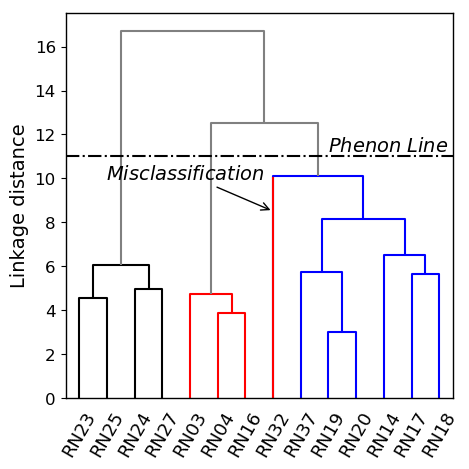

In [28]:
# Customize the colors of the nine clusters
colors=['k', 'r', 'b', 'g']
hierarchy.set_link_color_palette(colors)

# Data
ma_df = pd.DataFrame(data=rescaledX, columns=['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn'])
ma_df = ma_df.set_index(Y_df['Sample'])

plt.figure(figsize=(5, 5))
# Calculate the distance between each sample
Z = hierarchy.linkage(ma_df, 'ward')
sci = hierarchy.fcluster(Z, t=11, criterion='distance')

# Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=ma_df.index, above_threshold_color='grey')
plt.axhline(y=11, linestyle='-.', color='k')

#plt.xlabel('Sample')
plt.ylabel('Linkage distance', fontsize=14)
plt.plot([75, 75], [0, 10], color='r', lw=1.5)

plt.annotate('$Misclassification$',
             xy=(75, 8.5), xycoords='data',
             xytext=(-120, 23), textcoords='offset points',
             arrowprops=dict(arrowstyle="->"), fontsize=14)
plt.text(95, 11.25, '$Phenon$' + ' ' + '$Line$', fontsize=14)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['top'].set_color('k')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.xticks(fontsize=13, rotation=60)
plt.yticks(fontsize=12)

hierarchy.set_link_color_palette(None)

plt.show()

### t-SNE visualzation

[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 0.420387
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.370829
[t-SNE] KL divergence after 5000 iterations: 0.281243


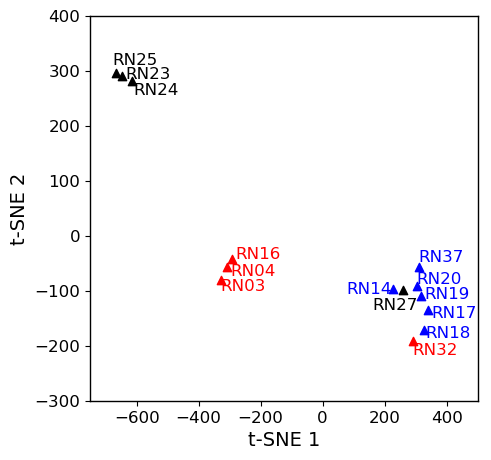

In [30]:
# Perform analysis
tsne = TSNE(n_components=2,
            init='pca',
            random_state=0, 
            perplexity=0.1,
            early_exaggeration=12,
            metric='euclidean',
            method='exact',
            n_iter=5000,
            verbose=1)

X_tsne = tsne.fit_transform(rescaledX)

# Plot the t-SNE map
plt.figure(figsize=(5, 5)) 

plt.scatter(X_tsne[Y_df['Region']=='Recharge and fow-through zone'][:, 0], X_tsne[Y_df['Region']=='Recharge and fow-through zone'][:, 1], color='k', marker='^')
plt.scatter(X_tsne[Y_df['Region']=='Cold water discharge zone'][:, 0],     X_tsne[Y_df['Region']=='Cold water discharge zone'][:, 1], color='b', marker='^')
plt.scatter(X_tsne[Y_df['Region']=='Thermal water discharge zone'][:, 0],  X_tsne[Y_df['Region']=='Thermal water discharge zone'][:, 1], color='r', marker='^')

plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.text(X_tsne[Y_df['Sample']=='RN25', 0] - 10,  X_tsne[Y_df['Sample']=='RN25', 1] + 15, 'RN25', fontsize=12)
plt.text(X_tsne[Y_df['Sample']=='RN23', 0] + 10,  X_tsne[Y_df['Sample']=='RN23', 1] - 5, 'RN23', fontsize=12)
plt.text(X_tsne[Y_df['Sample']=='RN24', 0] + 5,   X_tsne[Y_df['Sample']=='RN24', 1] - 25, 'RN24', fontsize=12)
plt.text(X_tsne[Y_df['Sample']=='RN27', 0] - 100, X_tsne[Y_df['Sample']=='RN27', 1] - 35, 'RN27', fontsize=12, color='k')

plt.text(X_tsne[Y_df['Sample']=='RN16', 0] + 10,  X_tsne[Y_df['Sample']=='RN16', 1] + 0, 'RN16', fontsize=12, color='r')
plt.text(X_tsne[Y_df['Sample']=='RN04', 0] + 10,  X_tsne[Y_df['Sample']=='RN04', 1] - 15, 'RN04', fontsize=12, color='r')
plt.text(X_tsne[Y_df['Sample']=='RN03', 0] - 0,   X_tsne[Y_df['Sample']=='RN03', 1] - 20, 'RN03', fontsize=12, color='r')

plt.text(X_tsne[Y_df['Sample']=='RN37', 0] - 0,   X_tsne[Y_df['Sample']=='RN37', 1] + 10, 'RN37', fontsize=12, color='b')
plt.text(X_tsne[Y_df['Sample']=='RN20', 0] - 0,   X_tsne[Y_df['Sample']=='RN20', 1] + 5, 'RN20', fontsize=12, color='b')
plt.text(X_tsne[Y_df['Sample']=='RN19', 0] + 10,  X_tsne[Y_df['Sample']=='RN19', 1] - 5, 'RN19', fontsize=12, color='b')
plt.text(X_tsne[Y_df['Sample']=='RN17', 0] + 10,  X_tsne[Y_df['Sample']=='RN17', 1] - 15, 'RN17', fontsize=12, color='b')
plt.text(X_tsne[Y_df['Sample']=='RN18', 0] + 5,   X_tsne[Y_df['Sample']=='RN18', 1] - 15, 'RN18', fontsize=12, color='b')
plt.text(X_tsne[Y_df['Sample']=='RN32', 0] - 0,   X_tsne[Y_df['Sample']=='RN32', 1] - 25, 'RN32', fontsize=12, color='r')
plt.text(X_tsne[Y_df['Sample']=='RN14', 0] - 150, X_tsne[Y_df['Sample']=='RN14', 1] - 10, 'RN14', fontsize=12, color='b')

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.xlim([-750, 500])
plt.ylim([-300, 400])

plt.show()

### Run t-SNE with different perplexity

[=================== [Perp=0] ==================]
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 0.420262
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.378277
[t-SNE] KL divergence after 5000 iterations: 0.347472
[=================== [Perp=0] ==================]
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 0.420277
[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.231690
[t-SNE] KL divergence after 5000 iterations: 0.270988
[=================== [Perp=0] ==================]
[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 14 / 14
[t-SNE] Mean sigma: 0.420291
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.982629
[t-SNE] KL divergence after 5000 iterations: 0.271438
[=================== [Perp=0] ==================]
[t-SNE] Com

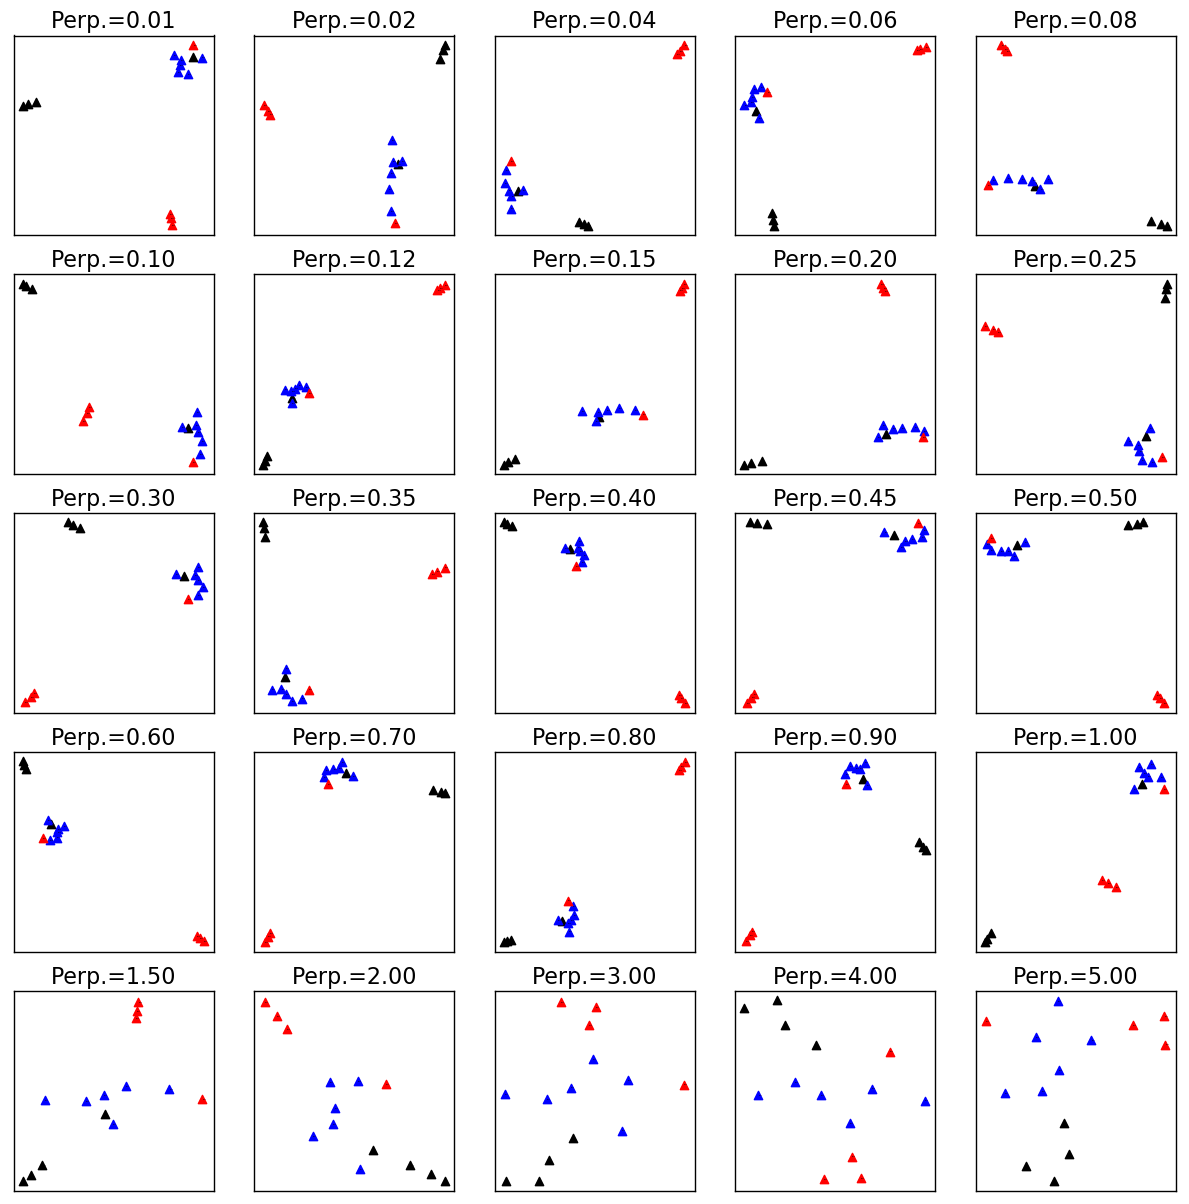

In [32]:
plt.figure(figsize=(15, 15))
i = 1
for perp in [0.01, 0.02, 0.04, 0.06, 0.08, 0.10, 0.12, 0.15, 0.2, 0.25, 0.30, 0.35, 0.4, 0.45, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0,  1.5, 2.0,  3.0,  4.0,  5.0]:
    print("[=================== [Perp=%.d] ==================]" %perp)
    tsne = TSNE(n_components=2,
                init='pca',
                random_state=0, 
                perplexity=perp,
                early_exaggeration=12,
                metric='euclidean',
                method='exact',
                n_iter=5000,
                verbose=1)

    X_tsne = tsne.fit_transform(rescaledX)

    # Plot the 2D plot 
    plt.subplot(5, 5, i)
    plt.scatter(X_tsne[Y_df['Region']=='Recharge and fow-through zone'][:, 0], X_tsne[Y_df['Region']=='Recharge and fow-through zone'][:, 1], color='k', marker='^')
    plt.scatter(X_tsne[Y_df['Region']=='Cold water discharge zone'][:, 0],     X_tsne[Y_df['Region']=='Cold water discharge zone'][:, 1], color='b', marker='^')
    plt.scatter(X_tsne[Y_df['Region']=='Thermal water discharge zone'][:, 0],  X_tsne[Y_df['Region']=='Thermal water discharge zone'][:, 1], color='r', marker='^')
    for sample in list(Y_df['Sample']):
        plt.text(X_tsne[Y_df['Sample']==sample, 0], X_tsne[Y_df['Sample']==sample, 1], sample, fontsize=1)
        
    plt.title('Perp.=%.2f' %perp, fontsize=16)
    plt.xticks([])
    plt.yticks([])
    
    ax1 = plt.gca()
    ax1.spines['top'].set_linewidth(1)
    ax1.spines['bottom'].set_linewidth(1)
    ax1.spines['left'].set_linewidth(1)
    ax1.spines['right'].set_linewidth(1)

    i = i + 1
    
plt.show()

## Samples from BMK

In [9]:
# Step 1 : Feature selection
pars = ['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn']
X_df = df[df['Subsystem']=='BMK'][pars]

# Step 2 : Substitution of censored values
X_df = X_df.replace('n.d.', 0.0075)

# Step 3 : Screening the non-measurement values
X_df = X_df.replace('n.m.', np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X = np.log(np.float64(X_df.values))

# Step 5 : Standardization 
rescaledX = StandardScaler().fit_transform(X)

In [10]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 7 
Number of variables: 30


In [11]:
# Get the true lables for the remianing samples
Y_df = df.replace('n.m.', np.nan)
Y_df = Y_df[['Subsystem', 'Region', 'Sample', 'Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn']][df['Subsystem']=='BMK'].dropna(axis=0, how='any') 

print(Y_df['Region'].unique())

['Recharge and flow-through zone'
 'Cold water discharge zone at the margin of the mountain']


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 7 / 7
[t-SNE] Mean sigma: 0.639883
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.330122
[t-SNE] KL divergence after 1700 iterations: 0.248805
Explained variance ration: [0.38762445 0.22275186]


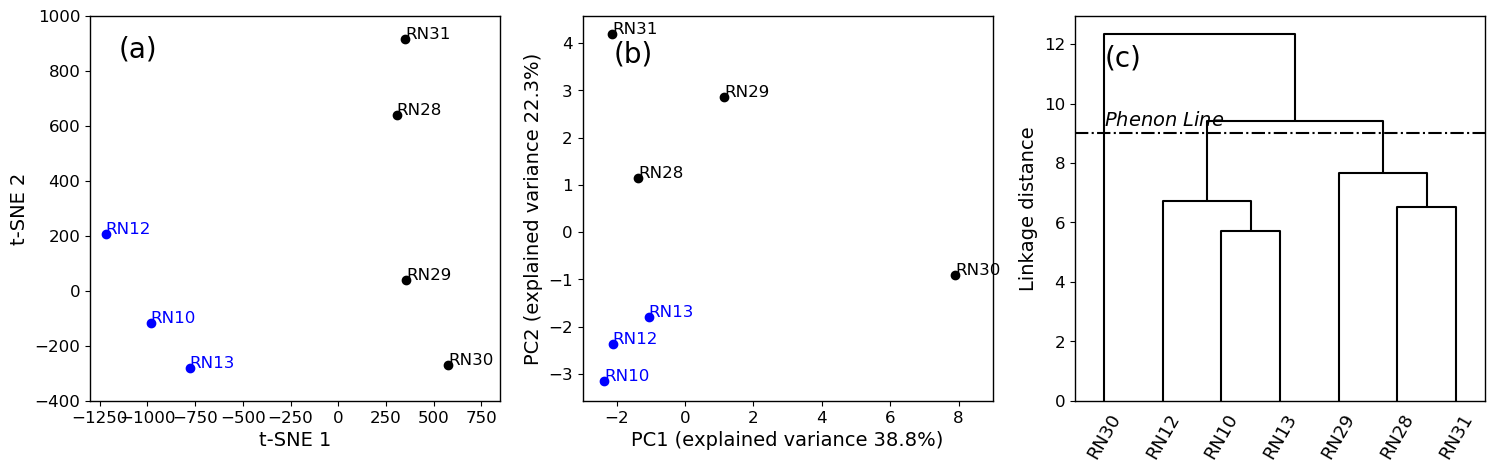

In [16]:
colors=['black']
hierarchy.set_link_color_palette(colors)
ma_df = pd.DataFrame(data=rescaledX, columns=['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn'])
ma_df = ma_df.set_index(Y_df['Sample'])

plt.figure(figsize=(18, 5))
# Plot the t-SNE
tsne = TSNE(n_components=2,
            init='pca',
            random_state=0, 
            perplexity=0.1,
            early_exaggeration=12,
            metric='euclidean',
            method='exact',
            n_iter=5000,
            verbose=1)

X_tsne = tsne.fit_transform(rescaledX)

# Plot the 2D plot 
plt.subplot(131)
plt.scatter(X_tsne[Y_df['Region']=='Recharge and flow-through zone'][:, 0], X_tsne[Y_df['Region']=='Recharge and flow-through zone'][:, 1], color='k', marker='o')
plt.scatter(X_tsne[Y_df['Region']=='Cold water discharge zone at the margin of the mountain'][:, 0], X_tsne[Y_df['Region']=='Cold water discharge zone at the margin of the mountain'][:, 1], color='b', marker='o')

#plt.xlim([-40, 40])
#plt.ylim([-40, 40])

plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for sample in ['RN12', 'RN10', 'RN13']:
    plt.text(X_tsne[Y_df['Sample']==sample, 0], X_tsne[Y_df['Sample']==sample, 1], sample, fontsize=12, color='b')

for sample in ['RN31', 'RN28', 'RN29', 'RN30']:
    plt.text(X_tsne[Y_df['Sample']==sample, 0], X_tsne[Y_df['Sample']==sample, 1], sample, fontsize=12, color='k')
    
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.xlim([-1300, 850])
plt.ylim([-400, 1000])
plt.text(-1150, 850, '(a)', fontsize=20)

# Plot the PCA
plt.subplot(132)
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rescaledX)

print('Explained variance ration:', pca.explained_variance_ratio_)

plt.scatter(X_pca[Y_df['Region']=='Recharge and flow-through zone'][:, 0], X_pca[Y_df['Region']=='Recharge and flow-through zone'][:, 1], color='k', marker='o')
plt.scatter(X_pca[Y_df['Region']=='Cold water discharge zone at the margin of the mountain'][:, 0], X_pca[Y_df['Region']=='Cold water discharge zone at the margin of the mountain'][:, 1], color='b', marker='o')


for sample in ['RN12', 'RN10', 'RN13']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1], sample, fontsize=12, color='b')

for sample in ['RN31', 'RN28', 'RN29', 'RN30']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1], sample, fontsize=12, color='k')
    

plt.xlabel('PC1 (explained variance 38.8%)', fontsize=14)
plt.ylabel('PC2 (explained variance 22.3%)', fontsize=14)
plt.text(-2.1, 3.6, '(b)', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([-3, 9])

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

colors=['k', 'k', 'k']
hierarchy.set_link_color_palette(colors)
ma_df = pd.DataFrame(data=rescaledX, columns=['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn'])

ma_df = ma_df.set_index(Y_df['Sample'])


plt.subplot(133)

# Calculate the distance between each sample
Z = hierarchy.linkage(ma_df, 'ward')
sci = hierarchy.fcluster(Z, t=11, criterion='distance')

# Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=ma_df.index, above_threshold_color='k')
plt.axhline(y=9, linestyle='-.', color='k')

#plt.xlabel('Sample')
plt.ylabel('Linkage distance', fontsize=14)

hierarchy.set_link_color_palette(None)

plt.text(5, 9.25, '$Phenon$' + ' ' + '$Line$', fontsize=14)
plt.text(5, 11.25, '(c)', fontsize=20)


ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['top'].set_color('k')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.xticks(fontsize=13, rotation=60)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.show()


## Samples from DMK

In [17]:
# Step 1 : Feature selection
pars = ['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn']
X_df = df[df['Subsystem']=='DMK'][pars]

# Step 2 : Substitution of censored values
X_df = X_df.replace('n.d.', 0.0075)

# Step 3 : Screening the non-measurement values
X_df = X_df.replace('n.m.', np.nan)
X_df = X_df.dropna(axis=0, how='any')

# Step 4: Data transformation
X = np.log(np.float64(X_df.values))

# Step 5 : Standardization 
rescaledX = StandardScaler().fit_transform(X)

In [18]:
# Print the remianing number of samples 
n_samples, n_parameters = rescaledX.shape
print('Number of samples:', n_samples, '\nNumber of variables:', n_parameters)

Number of samples: 6 
Number of variables: 30


In [20]:
# Get the true lables for the remianing samples
Y_df = df.replace('n.m.', np.nan)
Y_df = Y_df[['Subsystem', 'Region', 'Sample', 'Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn']][df['Subsystem']=='DMK'].dropna(axis=0, how='any') 

print(Y_df['Region'].unique())

['Recharge and flow-through zone' 'Cold water discharge zone'
 'Thermal water discharge zone']


[t-SNE] Computing pairwise distances...
[t-SNE] Computed conditional probabilities for sample 6 / 6
[t-SNE] Mean sigma: 0.508579
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.063483
[t-SNE] KL divergence after 1200 iterations: 0.338961
Explained variance ration: [0.58203262 0.21762638]


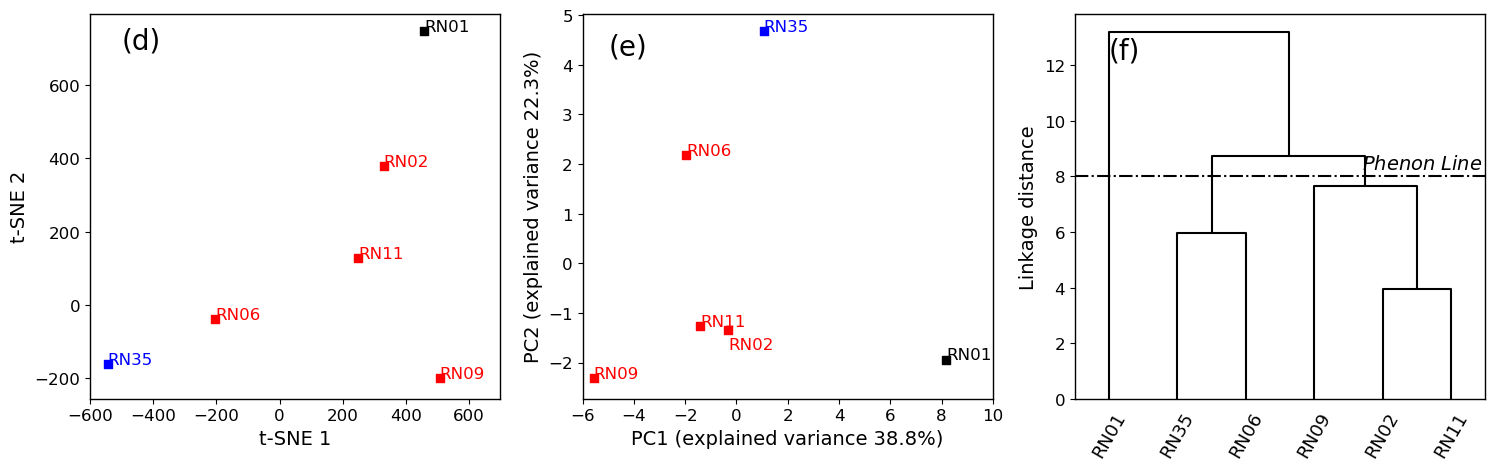

In [23]:
colors=['black']
hierarchy.set_link_color_palette(colors)

ma_df = pd.DataFrame(data=rescaledX, columns=['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn'])
ma_df = ma_df.set_index(Y_df['Sample'])

plt.figure(figsize=(18, 5))
# Plot the t-SNE
tsne = TSNE(n_components=2,
            init='pca',
            random_state=0, 
            perplexity=0.1,
            early_exaggeration=12,
            metric='euclidean',
            method='exact',
            n_iter=5000,
            verbose=1)

X_tsne = tsne.fit_transform(rescaledX)

# Plot the 2D plot 
plt.subplot(131)
plt.scatter(X_tsne[Y_df['Region']=='Recharge and flow-through zone'][:, 0], X_tsne[Y_df['Region']=='Recharge and flow-through zone'][:, 1], color='k', marker='s')
plt.scatter(X_tsne[Y_df['Region']=='Cold water discharge zone'][:, 0], X_tsne[Y_df['Region']=='Cold water discharge zone'][:, 1], color='b', marker='s')
plt.scatter(X_tsne[Y_df['Region']=='Thermal water discharge zone'][:, 0], X_tsne[Y_df['Region']=='Thermal water discharge zone'][:, 1], color='r', marker='s')

#plt.xlim([-40, 40])
#plt.ylim([-40, 40])

plt.xlabel('t-SNE 1', fontsize=14)
plt.ylabel('t-SNE 2', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

for sample in ['RN01']:
    plt.text(X_tsne[Y_df['Sample']==sample, 0], X_tsne[Y_df['Sample']==sample, 1], sample, fontsize=12, color='k')
    
for sample in ['RN35']:
    plt.text(X_tsne[Y_df['Sample']==sample, 0], X_tsne[Y_df['Sample']==sample, 1], sample, fontsize=12, color='b')

for sample in ['RN02', 'RN06', 'RN09', 'RN11']:
    plt.text(X_tsne[Y_df['Sample']==sample, 0], X_tsne[Y_df['Sample']==sample, 1], sample, fontsize=12, color='r')
    
ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.xlim([-600, 700])
#plt.ylim([-400, 1000])
plt.text(-500, 700, '(d)', fontsize=20)

# Plot the PCA
plt.subplot(132)
import numpy as np
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(rescaledX)

print('Explained variance ration:', pca.explained_variance_ratio_)

plt.scatter(X_pca[Y_df['Region']=='Recharge and flow-through zone'][:, 0], X_pca[Y_df['Region']=='Recharge and flow-through zone'][:, 1], color='k', marker='s')
plt.scatter(X_pca[Y_df['Region']=='Cold water discharge zone'][:, 0], X_pca[Y_df['Region']=='Cold water discharge zone'][:, 1], color='b', marker='s')
plt.scatter(X_pca[Y_df['Region']=='Thermal water discharge zone'][:, 0], X_pca[Y_df['Region']=='Thermal water discharge zone'][:, 1], color='r', marker='s')


for sample in ['RN01']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1], sample, fontsize=12, color='k')
for sample in ['RN35']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1], sample, fontsize=12, color='b')
for sample in ['RN06', 'RN09', 'RN11']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1], sample, fontsize=12, color='r')
for sample in ['RN02']:
    plt.text(X_pca[Y_df['Sample']==sample, 0], X_pca[Y_df['Sample']==sample, 1] - 0.4, sample, fontsize=12, color='r')    

plt.xlabel('PC1 (explained variance 38.8%)', fontsize=14)
plt.ylabel('PC2 (explained variance 22.3%)', fontsize=14)
plt.text(-5, 4.2, '(e)', fontsize=20)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim([-6, 10])

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

colors=['k', 'k', 'k']
hierarchy.set_link_color_palette(colors)
ma_df = pd.DataFrame(data=rescaledX, columns=['Temperature', 'pH', 'EC', 'HCO3', 'F', 'Cl', 'NO3', 'SO4', 'Ca', 'Mg',  'Na', 'K', 'Fe', 'Si', 'Sr', 'As' ,'Ag', 'Al', 'B', 'Ba', 'Cd', 'Co', 'Cu', 'Hg', 'Li', 'Mn', 'Mo', 'Ni', 'Sb', 'Zn'])
ma_df = ma_df.set_index(Y_df['Sample'])

plt.subplot(133)

# Calculate the distance between each sample
Z = hierarchy.linkage(ma_df, 'ward')
sci = hierarchy.fcluster(Z, t=11, criterion='distance')

# Plot with Custom leaves
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=ma_df.index, above_threshold_color='k')
plt.axhline(y=8, linestyle='-.', color='k')

#plt.xlabel('Sample')
plt.ylabel('Linkage distance', fontsize=14)

hierarchy.set_link_color_palette(None)

plt.text(42, 8.25, '$Phenon$' + ' ' + '$Line$', fontsize=14)
plt.text(5, 12.25, '(f)', fontsize=20)

ax = plt.gca()
ax.spines['top'].set_linewidth(1)
ax.spines['top'].set_color('k')
ax.spines['bottom'].set_linewidth(1)
ax.spines['left'].set_linewidth(1)
ax.spines['right'].set_linewidth(1)

plt.xticks(fontsize=13, rotation=60)
plt.yticks(fontsize=12)

plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.show()
